In [1]:
import numpy as np
from utils01 import GROParser

In [2]:
groparser = GROParser("input/solv_ions_prot.gro", 1.0)

ARRANGED_INDECES = groparser.arranged_indeces
SLICE_INDECES = groparser.slice_indeces

REARRANGED_INDECES = groparser.rearranged_indeces

In [3]:
fp = "workspace/04-simulate/trj.npy"
arr = np.load(fp)[:, ARRANGED_INDECES, :]
arr.shape

(500, 1235, 3)

# RMSF

In [4]:
l, u = SLICE_INDECES['CA']
rmsf = np.mean(np.sqrt(np.sum(np.square(arr - arr[0]), axis=2)), axis=0)[l:u]
rmsf.shape

(309,)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

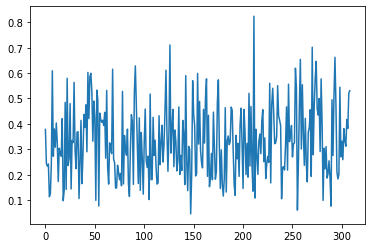

In [6]:
plt.plot(rmsf)

In [7]:
np.argmax(rmsf)

211

## all RMSF check

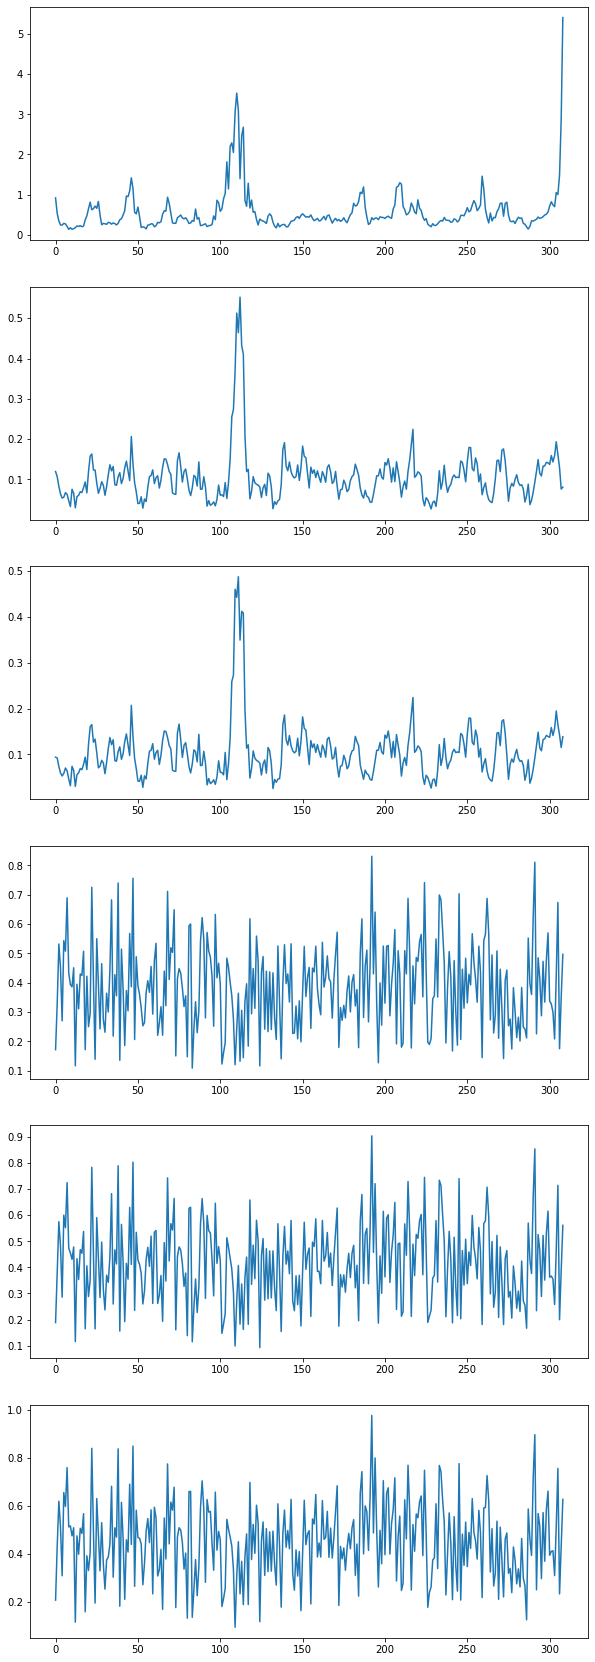

In [8]:
N = 6
fig = plt.figure(figsize=(10, 5*N))
for i in range(1, N+1):
    ax = fig.add_subplot(N, 1, i)
    fp = f"remote-workspace/04-simulate/test{i}.npy"
    arr = np.load(fp)[:, ARRANGED_INDECES, :]
    rmsf = np.mean(np.sqrt(np.sum(np.square(arr - arr[0]), axis=2)), axis=0)[l:u]
    ax.plot(rmsf)